# **기계학습 실습 과제-1,　기계학습, 허태영.** 

---




### 문제1. ['Harry', 'Ron', 'Hermione'] 리스트를 반환하는 good() 함수를 정의하고 호출하시오.


In [ ]:
def good():
  return(['Harry','Ron','Hermione'])

In [ ]:
good()

['Harry', 'Ron', 'Hermione']

### 문제2. 영어-프랑스어 사전을 의미하는 e2f 딕셔너리를 만들었다. 영어 dog는 프랑스어 chien이고, cat은 chat, walrus는 morse다. 다음 물음에 답하시오.

##### (a) e2f 딕셔너리에서 영어 walrus를 프랑스어로 출력해보자.

In [ ]:
e2f = {'dog':'chien', 'cat':'chat','walrus':'morse'}

In [ ]:
e2f['walrus']

'morse'

##### (b) e2f 딕셔너리의 영어 단어 키들을 출력해보자.

In [ ]:
e2f.keys()

dict_keys(['dog', 'cat', 'walrus'])

### 문제3. 다음을 python 코드로 작성하시오.

guess_me 변수에 5를 할당하고, for 문을 사용하여 range(10)에서 number 변수를 사용한다. number가 guess_me보다 작으면 ‘too low’를 출력한다. number와 guess_me가 같으면 ‘found it!’을 출력하고 반복문을 종료한다. number가 guess_me보다 크면 ‘oops’를 출력하고 반복문을 종료한다.

In [ ]:
guess_me = 5
for number in range(10):
  if number< guess_me:
    print('too low')
  elif number == guess_me:
    print('found it!')
    break
  else:
    print('oops')
    break

too low
too low
too low
too low
too low
found it!


### 문제 4. 프로그래머스 레벨 1 비밀지도

##### 입력 형식

입력으로 지도의 한 변 크기 $n$과 2개의 정수 배열 $arr1$, $arr2$가 들어온다.

- $1 \le n \le 16$
　
　
- $arr1,arr2$는 길이 $n$인 정수 배열로 주어진다.
　

- 정수 배열의 각 원소 $x$를 이진수로 변환했을 때의 길이는 $n$ 이하이다. 즉, $0 \le x \le 2^n-1$을 만족한다.

In [ ]:
# !pip install schemdraw

##### 알고리즘 순서도

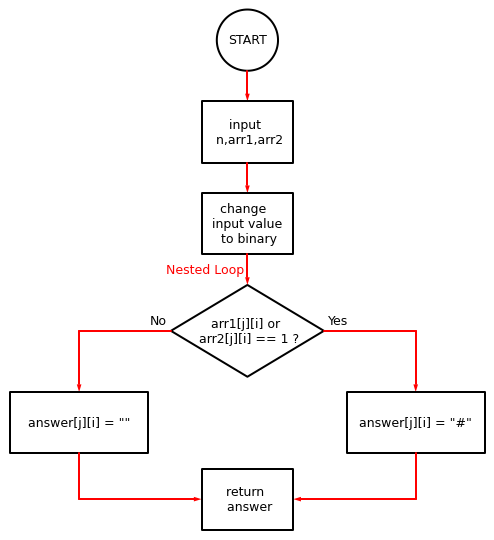

In [ ]:
import schemdraw
from schemdraw import flow

map = schemdraw.Drawing()
map.add(flow.Start(w=2,h=2, label="START"))
map.add(flow.Arrow('down', l=1,color='red'))
cond1 = map.add(flow.Box(label="input \n n,arr1,arr2"))

map.add(flow.Arrow('down', l=1,color='red'))
cond2 = map.add(flow.Box(label="change  \n input value \n to binary"))

map.add(flow.Arrow('down',label ="Nested Loop", l=1,color='red'))
cond3 = map.add(flow.Decision(E="Yes", W="No", label= "arr1[j][i] or \n arr2[j][i] == 1 ?",w=5,h=3))

map.add(flow.Line('right', xy=cond3.E ,l=3,color='red'))
map.add(flow.Arrow('down', l=2,color='red'))
cond4 = map.add(flow.Box(w=4.5,label="answer[j][i] = \"#\""))w

map.add(flow.Line('left', xy=cond3.W ,l=3,color='red'))
map.add(flow.Arrow('down', l=2,color='red'))
cond5 = map.add(flow.Box(w=4.5,label="answer[j][i] = \"\""))

cond6 = map.add(flow.Box(xy=[0,-15],label = "return \n answer"))
map.add(flow.Line('down',xy=cond4.S,toy=cond6.E, color='red'))
map.add(flow.Arrow('left',tox=cond6.E,color="red"))
map.add(flow.Line('down',xy=cond5.S,toy=cond6.W, color='red'))
map.add(flow.Arrow('right',tox=cond6.W, color='red'))


map.draw(show=True)


##### 이진법 함수를 모를 때

In [ ]:
def solution_1(n,arr1,arr2):
  arr1_bin = []
  arr2_bin = []
  answer = []

  ### 재귀함수를 이용하여 만든 2진수 변환 함수 ###
  def trans_binary(input_value):
    if(input_value<1):
      return '0'
    elif(input_value==1):
      return '1'
    if (input_value%2==0):
      return trans_binary(int(input_value/2)) + '0'
    elif (input_value%2==1):
      return trans_binary(int(input_value/2)) + '1'
    
  ### bin 리스트 만들기 ###
  for i in range(n):
    arr1_bin.append(trans_binary(arr1[i]))
    arr2_bin.append(trans_binary(arr2[i]))
  
  ### bin 리스트 자릿수 맞추기 ###
  for i in range(n):
    if len(arr1_bin[i]) != n:
      arr1_bin[i] = ('0'*(n-len(arr1_bin[i])))+arr1_bin[i]
    if len(arr2_bin[i]) != n:
      arr2_bin[i] = ('0'*(n-len(arr2_bin[i])))+arr2_bin[i]

  ### 두 지도 겹치기 ###
  for i in range(n):
    result = ''
    for j in range(n):
      if (int(arr1_bin[i][j]) or int(arr2_bin[i][j])) == 0:
        result = result + ' '
      else:
        result = result +'#'
    answer.append(result)  
  
  return answer

In [ ]:
solution_1(5,[9,20,28,18,11],[30,1,21,17,28])

['#####', '# # #', '### #', '#  ##', '#####']

In [ ]:
solution_1(6,[46,33,33,22,31,50],[27,56,19,14,14,10])

['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']

##### 이진법 함수를 알 때

In [ ]:
def solution_2(n,arr1,arr2):
  arr1_bin = []
  arr2_bin = []
  answer = []
  
  ### bin 리스트 만들기 ###
  for i in range(n):
    arr1_bin.append(bin(arr1[i])[2:])
    arr2_bin.append(bin(arr2[i])[2:])

  ### bin 리스트 자릿수 맞추기 ###
  for i in range(n):
    if len(arr1_bin[i]) != n:
      arr1_bin[i] = ('0'*(n-len(arr1_bin[i])))+arr1_bin[i]
    if len(arr2_bin[i]) != n:
      arr2_bin[i] = ('0'*(n-len(arr2_bin[i])))+arr2_bin[i]

  ### 두 지도 겹치기 ###
  for i in range(n):
    result = ''
    for j in range(n):
      if (int(arr1_bin[i][j]) or int(arr2_bin[i][j])) == 0:
        result = result + ' '
      else:
        result = result +'#'
    answer.append(result)  
  
  return answer

In [ ]:
solution_2(5,[9,20,28,18,11],[30,1,21,17,28])

['#####', '# # #', '### #', '#  ##', '#####']

In [ ]:
solution_2(6,[46,33,33,22,31,50],[27,56,19,14,14,10])

['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']